<a href="https://colab.research.google.com/github/MahaChlouh/airtraffic/blob/main/analyze_traffic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze  traffic dataset ✈

In [1]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.

In [2]:
!pip install mlforecast


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 KB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 KB 17.0 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.5-py3-none-any.whl size=157611 sha256=cea07960a9d59bf29db1cbe5b523ff80213c16ba075057450a1602990d949d64
  Stored in directory: /root/.cache/pip/wheels/61/d4/e5/7c90c375fba26867c6ec01bccb003b4cb983fe8386f2e0ffe0
Successfully built

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport



<ipython-input-3-c0984139dacc>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
pd.read_parquet('traffic_10lines.parquet')

date    pax  seats flight_type flight_typename home_airport  \
3223247  2018-08-04  155.0  156.0           J       Scheduled          LGW   
3223311  2017-05-03  132.0  144.0           J       Scheduled          LGW   
3223347  2022-08-05  136.0  156.0           J       Scheduled          LGW   
3223366  2019-10-16  170.0  180.0           J       Scheduled          LGW   
3223425  2019-01-26  166.0  180.0           J       Scheduled          LGW   
...             ...    ...    ...         ...             ...          ...   
9977453  2022-04-19   72.0  216.0           J       Scheduled          SCL   
9977758  2020-03-22  162.0  216.0           J       Scheduled          SCL   
9977808  2021-12-23  164.0  313.0           J       Scheduled          SCL   
9995284  2019-04-06  161.0  216.0           J       Scheduled          SCL   
10014282 2022-09-04  191.0  216.0           J       Scheduled          SCL   

         paired_airport                                   home_airportname  \
3223247             BCN                             London Gatwick Airport   
3223311             BCN                             London Gatwick Airport   
3223347             BCN                             London Gatwick Airport   
3223366             BCN                             London Gatwick Airport   
3223425             BCN                             London Gatwick Airport   
...                 ...                                                ...   
9977453             LHR  Comodoro Arturo Merino Benitez International A...   
9977758             LHR  Comodoro Arturo Merino Benitez International A...   
9977808             LHR  Comodoro Arturo Merino Benitez International A...   
9995284             LHR  Comodoro Arturo Merino Benitez International A...   
10014282            LHR  Comodoro Arturo Merino Benitez International A...   

               paired_airportname  distance  ... airline_iata  \
3223247                 Barcelone      1109  ...           U2   
3223311                 Barcelone      1109  ...           BA   
3223347                 Barcelone      1109  ...           U2   
3223366                 Barcelone      1109  ...           EC   
3223425                 Barcelone      1109  ...           U2   
...                           ...       ...  ...          ...   
9977453   London Heathrow Airport     11653  ...           BA   
9977758   London Heathrow Airport     11653  ...           BA   
9977808   London Heathrow Airport     11653  ...           BA   
9995284   London Heathrow Airport     11653  ...           BA   
10014282  London Heathrow Airport     11653  ...           BA   

             airline_name  scheduled_datetime direction home_country  \
3223247           EasyJet 2018-08-04 12:15:00         A           GB   
3223311   British Airways 2017-05-03 11:20:00         D           GB   
3223347           EasyJet 2022-08-05 21:55:00         A           GB   
3223366           EasyJet 2019-10-16 09:10:00         D           GB   
3223425           EasyJet 2019-01-26 06:55:00         D           GB   
...                   ...                 ...       ...          ...   
9977453   British Airways 2022-04-19 07:25:00         A           CL   
9977758   British Airways 2020-03-22 16:45:00         D           CL   
9977808   British Airways 2021-12-23 10:04:00         A           CL   
9995284   British Airways 2019-04-06 08:35:00         A           CL   
10014282  British Airways 2022-09-04 07:59:00         A           CL   

         paired_country home_countryname paired_countryname  \
3223247              ES   United Kingdom              Spain   
3223311              ES   United Kingdom              Spain   
3223347              ES   United Kingdom              Spain   
3223366              ES   United Kingdom              Spain   
3223425              ES   United Kingdom              Spain   
...                 ...              ...                ...   
9977453              GB            Chile     United Ki

In [5]:
traffic_df = pd.read_parquet('traffic_10lines.parquet')

In [6]:
ls -lh

total 4.9M
drwxr-xr-x 1 root root 4.0K Mar 16 13:45 sample_data/
-rw-r--r-- 1 root root 4.9M Mar 18 07:20 traffic_10lines.parquet


In [7]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254899 entries, 3223247 to 10014282
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                254899 non-null  datetime64[ns]
 1   pax                 254899 non-null  float64       
 2   seats               250749 non-null  float64       
 3   flight_type         251168 non-null  object        
 4   flight_typename     254899 non-null  object        
 5   home_airport        254899 non-null  object        
 6   paired_airport      254899 non-null  object        
 7   home_airportname    254899 non-null  object        
 8   paired_airportname  254899 non-null  object        
 9   distance            254899 non-null  Int64         
 10  flight_number       251438 non-null  object        
 11  airline_iata        248648 non-null  object        
 12  airline_name        254813 non-null  object        
 13  scheduled_datetime  2

In [8]:
traffic_df.describe()

pax          seats       distance
count  254899.000000  250749.000000  254899.000000
mean      127.082676     159.352879     944.365078
std        53.050019      47.311964     886.540144
min       -11.000000       0.000000     277.000000
25%        88.000000     144.000000     277.000000
50%       140.000000     174.000000    1109.000000
75%       168.000000     186.000000    1437.000000
max       582.000000     615.000000   11653.000000

In [9]:
traffic_df.describe(include='all').transpose()

<ipython-input-9-7d983b1c6b81>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()
<ipython-input-9-7d983b1c6b81>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()


count  unique                  top    freq  \
date                  254899    2626  2019-01-02 00:00:00     165   
pax                 254899.0     NaN                  NaN     NaN   
seats               250749.0     NaN                  NaN     NaN   
flight_type           251168      19                    J  240627   
flight_typename       254899       4            Scheduled  251250   
home_airport          254899       8                  LIS  125254   
paired_airport        254899      10                  OPO   72331   
home_airportname      254899       8               Lisbon  125254   
paired_airportname    254899      10                Porto   72331   
distance            254899.0     NaN                  NaN     NaN   
flight_number         251438    2663               TP 433    2332   
airline_iata          248648      90                   TP   91648   
airline_name          254813     131                  TAP   91648   
scheduled_datetime    254899  201668  2019-08-29 18:05:00       5   
direction             254899       2                    D  127622   
home_country          254899       7                   PT  125254   
paired_country        254899       8                   PT   72331   
home_countryname      254899       7             Portugal  125254   
paired_countryname    254899       8             Portugal   72331   
travel_area           254899       4             Domestic  108770   
aircraft_type         251439     168                 A320   30344   

                                 first                last        mean  \
date               2016-01-01 00:00:00 2023-03-10 00:00:00         NaN   
pax                                NaT                 NaT  127.082676   
seats                              NaT                 NaT  159.352879   
flight_type                        NaT                 NaT         NaN   
flight_typename                    NaT                 NaT         NaN   
home_airport                       NaT                 NaT         NaN   
paired_airport                     NaT                 NaT         NaN   
home_airportname                   NaT                 NaT         NaN   
paired_airportname                 NaT                 NaT         NaN   
distance                           NaT                 NaT  944.365078   
flight_number                      NaT                 NaT         NaN   
airline_iata                       NaT                 NaT         NaN   
airline_name                       NaT                 NaT         NaN   
scheduled_datetime 2016-01-01 06:10:00 2023-03-10 00:50:00         NaN   
direction                          NaT                 NaT         NaN   
home_country                       NaT                 NaT         NaN   
paired_country                     NaT                 NaT         NaN   
home_countryname                   NaT                 NaT         NaN   
paired_countryname                 NaT                 NaT         NaN   
travel_area                        NaT                 NaT         NaN   
aircraft_type                      NaT                 NaT         NaN   

                           std    min    25%     50%     75%      max  
date                       NaN    NaN    NaN     NaN     NaN      NaN  
pax                  53.050019  -11.0   88.0   140.0   168.0    582.0  
seats                47.311964    0.0  144.0   174.0   186.0    615.0  
flight_type                NaN    NaN    NaN     NaN     NaN      NaN  
flight_typename            NaN    NaN    NaN     NaN     NaN      NaN  
home_airport               NaN    NaN    NaN     NaN     NaN      NaN  
paired_airport             NaN    NaN    NaN     NaN     NaN      NaN  
home_airportname           NaN    NaN    NaN     NaN     NaN      NaN  
paired_airportname         NaN    NaN    NaN     NaN     NaN      NaN  
distance            886.540144  277.0  277.0  1109.0  1437.0  11653.0  
flight_number              NaN    NaN    NaN     NaN     NaN      NaN  
airline_iat

In [10]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [11]:
profile_report =  ProfileReport(traffic_df)

In [12]:
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
profile_report.to_file(output_file="profile_report_airtraffic.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
traffic_df

date    pax  seats flight_type flight_typename home_airport  \
3223247  2018-08-04  155.0  156.0           J       Scheduled          LGW   
3223311  2017-05-03  132.0  144.0           J       Scheduled          LGW   
3223347  2022-08-05  136.0  156.0           J       Scheduled          LGW   
3223366  2019-10-16  170.0  180.0           J       Scheduled          LGW   
3223425  2019-01-26  166.0  180.0           J       Scheduled          LGW   
...             ...    ...    ...         ...             ...          ...   
9977453  2022-04-19   72.0  216.0           J       Scheduled          SCL   
9977758  2020-03-22  162.0  216.0           J       Scheduled          SCL   
9977808  2021-12-23  164.0  313.0           J       Scheduled          SCL   
9995284  2019-04-06  161.0  216.0           J       Scheduled          SCL   
10014282 2022-09-04  191.0  216.0           J       Scheduled          SCL   

         paired_airport                                   home_airportname  \
3223247             BCN                             London Gatwick Airport   
3223311             BCN                             London Gatwick Airport   
3223347             BCN                             London Gatwick Airport   
3223366             BCN                             London Gatwick Airport   
3223425             BCN                             London Gatwick Airport   
...                 ...                                                ...   
9977453             LHR  Comodoro Arturo Merino Benitez International A...   
9977758             LHR  Comodoro Arturo Merino Benitez International A...   
9977808             LHR  Comodoro Arturo Merino Benitez International A...   
9995284             LHR  Comodoro Arturo Merino Benitez International A...   
10014282            LHR  Comodoro Arturo Merino Benitez International A...   

               paired_airportname  distance  ... airline_iata  \
3223247                 Barcelone      1109  ...           U2   
3223311                 Barcelone      1109  ...           BA   
3223347                 Barcelone      1109  ...           U2   
3223366                 Barcelone      1109  ...           EC   
3223425                 Barcelone      1109  ...           U2   
...                           ...       ...  ...          ...   
9977453   London Heathrow Airport     11653  ...           BA   
9977758   London Heathrow Airport     11653  ...           BA   
9977808   London Heathrow Airport     11653  ...           BA   
9995284   London Heathrow Airport     11653  ...           BA   
10014282  London Heathrow Airport     11653  ...           BA   

             airline_name  scheduled_datetime direction home_country  \
3223247           EasyJet 2018-08-04 12:15:00         A           GB   
3223311   British Airways 2017-05-03 11:20:00         D           GB   
3223347           EasyJet 2022-08-05 21:55:00         A           GB   
3223366           EasyJet 2019-10-16 09:10:00         D           GB   
3223425           EasyJet 2019-01-26 06:55:00         D           GB   
...                   ...                 ...       ...          ...   
9977453   British Airways 2022-04-19 07:25:00         A           CL   
9977758   British Airways 2020-03-22 16:45:00         D           CL   
9977808   British Airways 2021-12-23 10:04:00         A           CL   
9995284   British Airways 2019-04-06 08:35:00         A           CL   
10014282  British Airways 2022-09-04 07:59:00         A           CL   

         paired_country home_countryname paired_countryname  \
3223247              ES   United Kingdom              Spain   
3223311              ES   United Kingdom              Spain   
3223347              ES   United Kingdom              Spain   
3223366              ES   United Kingdom              Spain   
3223425              ES   United Kingdom              Spain   
...                 ...              ...                ...   
9977453              GB            Chile     United Ki

y=pax, seats*(loud factor)=pax

Modéles Stats:
-lissage exponential
-AR, ARMA, ARIMA

Modéles ML: - XGBoost - Regressions - fb_Prophet

Modéles DeepLearning: - LSTM - Deep* (biblio Nixtla)


In [15]:
(traffic_df
 .groupby(['home_airport', 'paired_airport'])
 .agg(date_min=('date', 'min'), date_max=('date', 'max'), pax=('pax', 'sum'))
 .reset_index()
)

home_airport paired_airport   date_min   date_max        pax
0          LGW            AMS 2016-01-01 2023-03-09  5372822.0
1          LGW            BCN 2016-01-01 2023-03-10  7613076.0
2          LIS            OPO 2016-01-01 2023-03-09  5632745.0
3          LIS            ORY 2016-01-01 2023-03-09  7696068.0
4          LYS            PIS 2017-11-20 2023-03-09    10351.0
5          NTE            FUE 2019-01-06 2023-03-05    99854.0
6          PNH            NGB 2016-05-05 2023-03-07    10018.0
7          POP            JFK 2018-01-01 2023-03-09   492434.0
8          SCL            LHR 2019-01-01 2023-03-07   193693.0
9          SSA            GRU 2019-01-01 2023-03-09  5272186.0

In [16]:
(traffic_df
 .groupby(['home_airport', 'paired_airport', 'direction'])
 .agg(date_min=('date', 'min'), date_max=('date', 'max'), pax=('pax', 'sum'))
 .reset_index()
)

home_airport paired_airport direction   date_min   date_max        pax
0           LGW            AMS         A 2016-01-01 2023-03-09  2686346.0
1           LGW            AMS         D 2016-01-01 2023-03-09  2686476.0
2           LGW            BCN         A 2016-01-01 2023-03-10  3813240.0
3           LGW            BCN         D 2016-01-01 2023-03-09  3799836.0
4           LIS            OPO         A 2016-01-01 2023-03-09  2819094.0
5           LIS            OPO         D 2016-01-01 2023-03-09  2813651.0
6           LIS            ORY         A 2016-01-01 2023-03-09  3835664.0
7           LIS            ORY         D 2016-01-01 2023-03-09  3860404.0
8           LYS            PIS         A 2017-11-20 2023-03-09     6173.0
9           LYS            PIS         D 2018-01-02 2023-03-09     4178.0
10          NTE            FUE         A 2019-01-06 2023-03-05    51406.0
11          NTE            FUE         D 2019-01-06 2023-03-05    48448.0
12          PNH            NGB         A 2017-01-11 2020-02-04     5674.0
13          PNH            NGB         D 2016-05-05 2023-03-07     4344.0
14          POP            JFK         A 2018-01-01 2023-03-09   244235.0
15          POP            JFK         D 2018-01-01 2023-03-09   248199.0
16          SCL            LHR         A 2019-01-01 2023-03-07    95959.0
17          SCL            LHR         D 2019-01-01 2023-03-07    97734.0
18          SSA            GRU         A 2019-01-01 2023-03-09  2609960.0
19          SSA            GRU         D 2019-01-01 2023-03-09  2662226.0

#Visualisation

In [17]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 ['airline_name']
 .value_counts() 
 )

Volotea                362
Smartwings             140
Transavia               98
Enter Air               81
ASL Airlines France      1
Ryanair                  1
Name: airline_name, dtype: int64

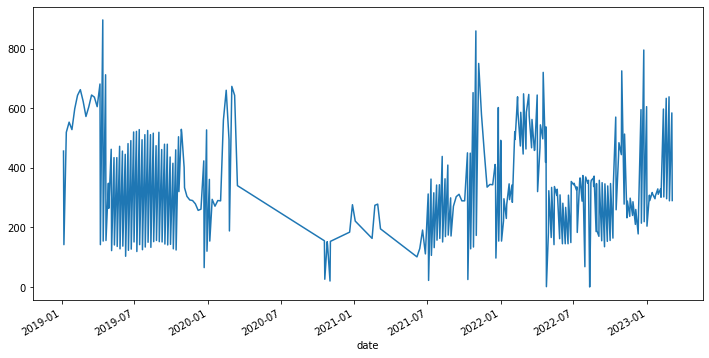

In [18]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
.groupby(['home_airport', 'paired_airport', 'date'])
.agg(pax_total=('pax', 'sum'))
.reset_index()
.set_index('date')
['pax_total']
.plot(figsize=(12,6))
);

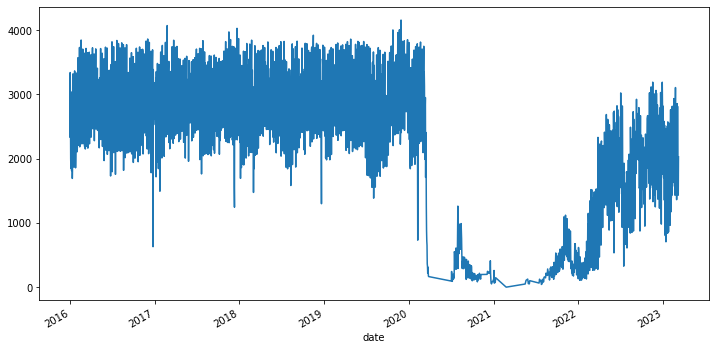

In [19]:
#%matplotlib inline per jupyter
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
.groupby(['home_airport', 'paired_airport', 'date'])
.agg(pax_total=('pax', 'sum'))
.reset_index()
.set_index('date')
['pax_total']
.plot(figsize=(12,6))
);

In [20]:
import seaborn as sns
sns.set()

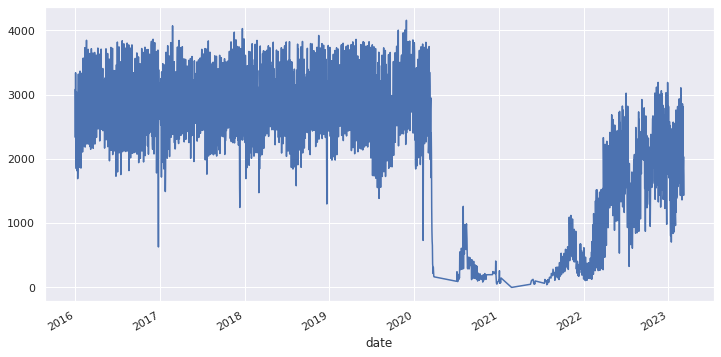

In [21]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
.groupby(['home_airport', 'paired_airport', 'date'])
.agg(pax_total=('pax', 'sum'))
.reset_index()
.set_index('date')
['pax_total']
.plot(figsize=(12,6))
);

In [22]:
import datetime
import plotly

import plotly.offline as pyoff
import plotly.graph_objs as go

from plotly.subplots import make_subplots


def draw_ts_multiple(df: pd.DataFrame, v1: str, v2: str=None, prediction: str=None, date: str='date',
              secondary_y=True, covid_zone=False, display=True):
  """Draw times series possibly on two y axis, with COVID period option.

  Args:
  - df (pd.DataFrame): time series dataframe (one line per date, series in columns)
  - v1 (str | list[str]): name or list of names of the series to plot on the first x axis
  - v2 (str): name of the serie to plot on the second y axis (default: None)
  - prediction (str): name of v1 hat (prediction) displayed with a dotted line (default: None)
  - date (str): name of date column for time (default: 'date')
  - secondary_y (bool): use a secondary y axis if v2 is used (default: True)
  - covid_zone (bool): highlight COVID-19 period with a grayed rectangle (default: False)
  - display (bool): display figure otherwise just return the figure (default: True)

  Returns:
  - fig (plotly.graph_objs._figure.Figure): Plotly figure generated

  Notes:
  Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
  Or use `display=False`.
  """
  if isinstance(v1, str):
    variables = [(v1, 'V1')]
  else:
    variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
  title = '<br>'.join([n + ': '+ v for v, n in variables]) + ('<br>V2: ' + v2) if v2 else '<br>'.join([v + ': '+ n for v, n in variables])
  layout = dict(
    title=title,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
  )
  fig = make_subplots(specs=[[{"secondary_y": True}]])
  fig.update_layout(layout)
  for v, name in variables:
    fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
  if v2:
    fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
    fig['layout']['yaxis2']['showgrid'] = False
    fig.update_yaxes(rangemode='tozero')
    fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
  if prediction:
    fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

  if covid_zone:
    fig.add_vrect(
        x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
        fillcolor="Gray", opacity=0.5,
        layer="below", line_width=0,
    )
  if display:
    pyoff.iplot(fig)
  return fig

In [23]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total'
)

In [24]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone=True,
)

In [25]:
nte_fue_df= (traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
.groupby(['home_airport', 'paired_airport', 'date'])
.agg(pax_total=('pax', 'sum'))
.reset_index()
)
nte_fue_df

home_airport paired_airport       date  pax_total
0            NTE            FUE 2019-01-06      456.0
1            NTE            FUE 2019-01-07      142.0
2            NTE            FUE 2019-01-13      519.0
3            NTE            FUE 2019-01-20      553.0
4            NTE            FUE 2019-01-27      528.0
..           ...            ...        ...        ...
288          NTE            FUE 2023-02-19      296.0
289          NTE            FUE 2023-02-25      638.0
290          NTE            FUE 2023-02-26      289.0
291          NTE            FUE 2023-03-04      584.0
292          NTE            FUE 2023-03-05      290.0

[293 rows x 4 columns]

In [26]:
lgw_ams_df= (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
.groupby(['home_airport', 'paired_airport', 'date'])
.agg(pax_total=('pax', 'sum'))
.reset_index()
)
lgw_ams_df

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

- Prophet (Stat/ML)
- Nixtla (ML + DL)
- statmodels

In [27]:
def generate_route_df(traffic_df : pd.DataFrame, homeAirport : str, pairedAirport : str) -> pd.DataFrame:
  """Extract route dataframe from traffic dataframe for route from home airport to paired airport 

  Args:
  - traffic_df (pd.DataFrame): traffic dataframe
  - homeAirport (str): IATA Code for home airport
  - pairedAirport (str): IATA Code for paired airport

  Returns:
  - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
  """
  _df=(traffic_df
      .query ('home_airport == "{home}" and paired_airport =="{paired}"'.format(home=homeAirport, paired=pairedAirport))
      .groupby(['home_airport', 'paired_airport', 'date'])
      .agg(pax_total=('pax', 'sum'))
      .reset_index() 
      )
  return  _df
  # _ accessorio per non dimenticare che sia temporanea , _ _ df = double per nascondere una variabile cosi non si vede per gli estranei

In [28]:
generate_route_df(traffic_df, "LGW", "AMS")

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

In [29]:
nte_fue_df=(traffic_df
 .query ('home_airport == "NTE" and paired_airport =="FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index() 
 )
nte_fue_df


home_airport paired_airport       date  pax_total
0            NTE            FUE 2019-01-06      456.0
1            NTE            FUE 2019-01-07      142.0
2            NTE            FUE 2019-01-13      519.0
3            NTE            FUE 2019-01-20      553.0
4            NTE            FUE 2019-01-27      528.0
..           ...            ...        ...        ...
288          NTE            FUE 2023-02-19      296.0
289          NTE            FUE 2023-02-25      638.0
290          NTE            FUE 2023-02-26      289.0
291          NTE            FUE 2023-03-04      584.0
292          NTE            FUE 2023-03-05      290.0

[293 rows x 4 columns]

In [30]:
nte_ams_df=(traffic_df
 .query ('home_airport == "LGW" and paired_airport =="AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index() 
 )
nte_ams_df


home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

#First model with facebook

In [31]:
from prophet import Prophet

In [32]:
baseline_model= Prophet()
baseline_model.fit(nte_fue_df.rename(columns={'date':'ds', 'pax_total':'y'}))


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79oe4gxf/ns8dnggj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79oe4gxf/mvl6q9tp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25964', 'data', 'file=/tmp/tmp79oe4gxf/ns8dnggj.json', 'init=/tmp/tmp79oe4gxf/mvl6q9tp.json', 'output', 'file=/tmp/tmp79oe4gxf/prophet_modelayqc3c8l/prophet_model-20230318072305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
baseline_model= Prophet()
baseline_model.fit(generate_route_df(traffic_df, "NTE", "FUE").rename(columns={'date':'ds', 'pax_total':'y'}))


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79oe4gxf/rb9gjwmp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79oe4gxf/6ac_8aad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53772', 'data', 'file=/tmp/tmp79oe4gxf/rb9gjwmp.json', 'init=/tmp/tmp79oe4gxf/6ac_8aad.json', 'output', 'file=/tmp/tmp79oe4gxf/prophet_modelu9yay38a/prophet_model-20230318072305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
future_df = baseline_model.make_future_dataframe(periods=15)
future_df.tail(2)

ds
306 2023-03-19
307 2023-03-20

In [35]:
future_df = baseline_model.make_future_dataframe(periods=15)
future_df
# per estendere la base de données con i giorni da predire

ds
0   2019-01-06
1   2019-01-07
2   2019-01-13
3   2019-01-20
4   2019-01-27
..         ...
303 2023-03-16
304 2023-03-17
305 2023-03-18
306 2023-03-19
307 2023-03-20

[308 rows x 1 columns]

In [36]:
forecast_df =  baseline_model.predict(future_df)
# per la predizione

In [37]:
forecast_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2019-01-06  366.987264  327.374019  623.840025   366.987264   366.987264   
1   2019-01-07  366.754933   65.449935  362.792136   366.754933   366.754933   
2   2019-01-13  365.360946  276.157825  572.618882   365.360946   365.360946   
3   2019-01-20  363.734627  268.516318  556.675162   363.734627   363.734627   
4   2019-01-27  362.108309  317.999809  607.437600   362.108309   362.108309   
..         ...         ...         ...         ...          ...          ...   
303 2023-03-16  250.086252  -33.930534  275.732271   250.086252   250.086252   
304 2023-03-17  250.129075  266.250995  565.689208   250.129075   250.129075   
305 2023-03-18  250.171898  327.822534  627.469085   250.171898   250.171898   
306 2023-03-19  250.214721  350.414595  656.266428   250.214721   250.216966   
307 2023-03-20  250.257544  116.526030  403.243942   250.257544   250.262951   

     additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0        113.963365            113.963365            113.963365  136.806409   
1       -148.140453           -148.140453           -148.140453 -115.899406   
2         56.838713             56.838713             56.838713  136.806409   
3         49.792236             49.792236             49.792236  136.806409   
4        103.916880            103.916880            103.916880  136.806409   
..              ...                   ...                   ...         ...   
303     -132.497205           -132.497205           -132.497205 -256.348557   
304      168.375159            168.375159            168.375159   44.060402   
305      227.954512            227.954512            227.954512  103.260604   
306      261.821769            261.821769            261.821769  136.806409   
307        9.411225              9.411225              9.411225 -115.899406   

     weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0      136.806409    136.806409  -22.843043    -22.843043    -22.843043   
1     -115.899406   -115.899406  -32.241047    -32.241047    -32.241047   
2      136.806409    136.806409  -79.967696    -79.967696    -79.967696   
3      136.806409    136.806409  -87.014173    -87.014173    -87.014173   
4      136.806409    136.806409  -32.889528    -32.889528    -32.889528   
..            ...           ...         ...           ...           ...   
303   -256.348557   -256.348557  123.851352    123.851352    123.851352   
304     44.060402     44.060402  124.314757    124.314757    124.314757   
305    103.260604    103.260604  124.693908    124.693908    124.693908   
306    136.806409    136.806409  125.015360    125.015360    125.015360   
307   -115.899406   -115.899406  125.310631    125.310631    125.310631   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
303                   0.0                         0.0   
304                   0.0                         0.0   
305                   0.0                         0.0   
306                   0.0                         0.0   
307                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0  480.950629  
1                           0.0  218.614479  
2                           0.0  422.199658  
3                           0.0  413.526863  
4                           0.0  466.025189  
..                          ...         ...  
303                         0.0  117.589047  
304                         0.0  418.504234  
305                         0.0  478.126410  
306                         0.0  512.036491  
307       

In [38]:
nte_fue_df.query('date == "2019-01-06"')

home_airport paired_airport       date  pax_total
0          NTE            FUE 2019-01-06      456.0

In [39]:
nte_fue_df.query('date == "2019-01-07"')

home_airport paired_airport       date  pax_total
1          NTE            FUE 2019-01-07      142.0

In [40]:
nte_fue_df.shape

(293, 4)

In [41]:
forecast_df.shape

(308, 19)

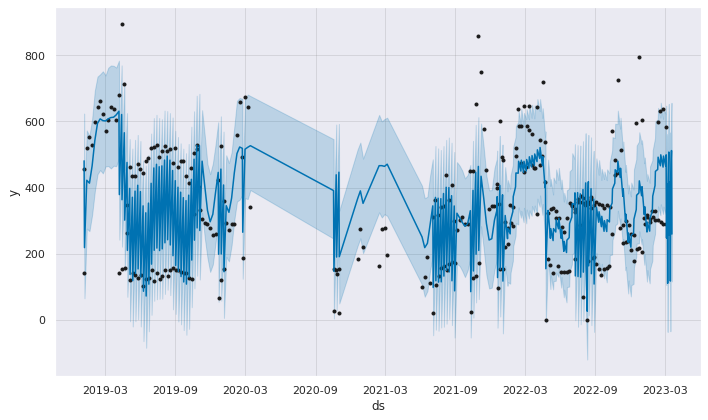

In [42]:
baseline_model.plot(forecast_df);
#in nero é la realtà, la curva blu é la predizione, l'azzurro é l'intervalle de confiance

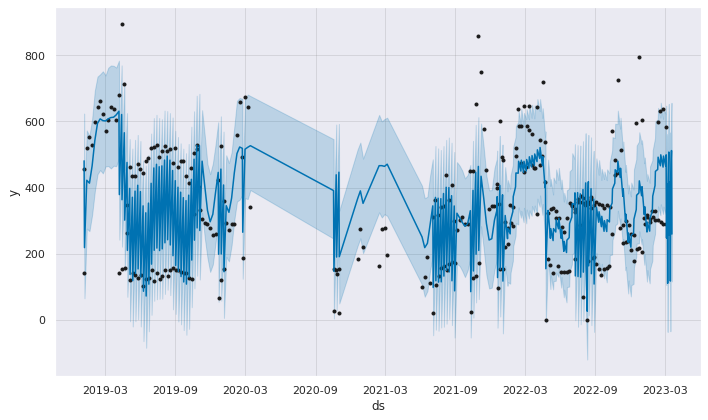

In [43]:
graph = baseline_model.plot(forecast_df)

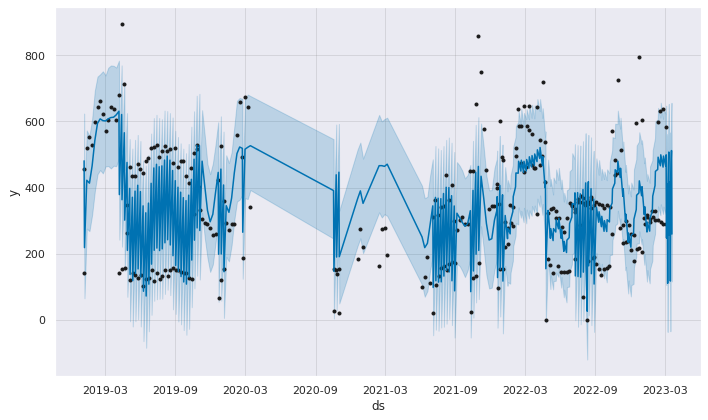

In [44]:
graph

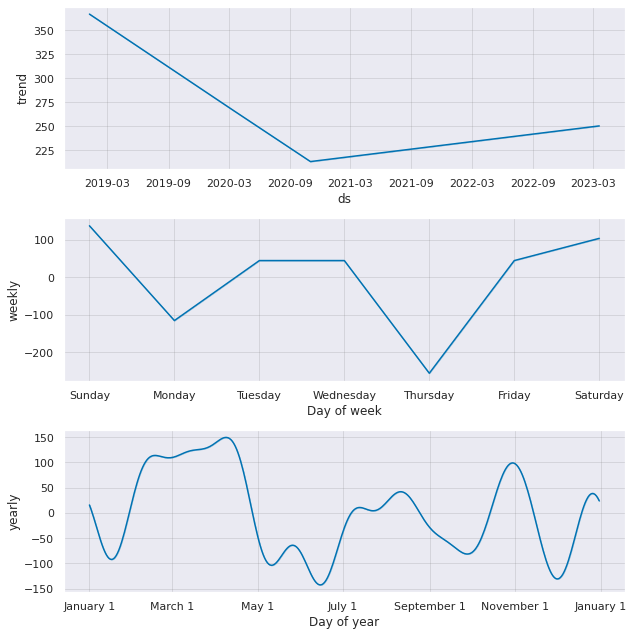

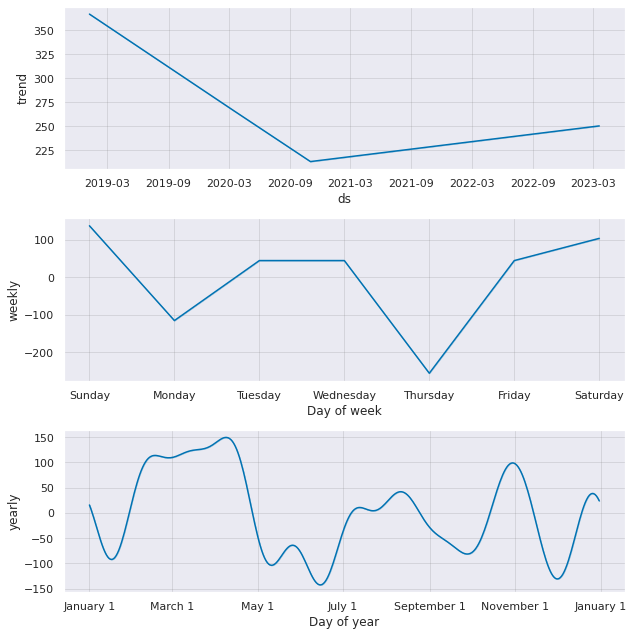

In [45]:
baseline_model.plot_components(forecast_df)
#serie fourrier, prende i segnali e li caratterizza per stagione e serie
# come interpretazione, tipo il lunedi in media abbiamo 100 passegeri in più

## Evaluate performance

- Métrique:
  - RMSE 
  - MAPE
- Procédure:
  - CV


In [46]:
from prophet.diagnostics import cross_validation

In [47]:
generate_route_df(traffic_df, "NTE", "FUE").date.nunique()
# combien de jours dans la BD

293

In [48]:
generate_route_df(traffic_df, "NTE", "FUE").date.min()

Timestamp('2019-01-06 00:00:00')

In [49]:
generate_route_df(traffic_df, "NTE", "FUE").date.max()

Timestamp('2023-03-05 00:00:00')

In [50]:
eval_df = cross_validation(baseline_model, initial='366 days', period='90 days', horizon='90 days')

INFO:prophet:Making 10 forecasts with cutoffs between 2020-09-16 00:00:00 and 2022-12-05 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp79oe4gxf/z_9iey5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79oe4gxf/k814fds5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19269', 'data', 'file=/tmp/tmp79oe4gxf/z_9iey5z.json', 'init=/tmp/tmp79oe4gxf/k814fds5.json', 'output', 'file=/tmp/tmp79oe4gxf/prophet_modellgdmdz2r/prophet_model-20230318072309.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:23:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79oe4gxf/nh5rukp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79oe4gxf/tj2tipyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [51]:
eval_df

ds        yhat  yhat_lower  yhat_upper      y     cutoff
0   2020-10-18  447.472952  357.900460  542.343454  155.0 2020-09-16
1   2020-10-19  124.280990   29.741530  216.696047   26.0 2020-09-16
2   2020-10-25  488.585274  405.447168  580.072805  152.0 2020-09-16
3   2020-10-26  153.801841   58.363733  236.385579  139.0 2020-09-16
4   2020-11-01  439.584883  341.545854  534.032135   20.0 2020-09-16
..         ...         ...         ...         ...    ...        ...
189 2023-02-19  562.993455  420.344204  694.489789  296.0 2022-12-05
190 2023-02-25  465.255019  331.782506  604.410776  638.0 2022-12-05
191 2023-02-26  553.509927  427.880401  691.913454  289.0 2022-12-05
192 2023-03-04  465.385062  326.884140  608.090152  584.0 2022-12-05
193 2023-03-05  555.602132  401.895319  694.630896  290.0 2022-12-05

[194 rows x 6 columns]

In [52]:
from prophet.diagnostics import performance_metrics

In [53]:
performance_metrics(eval_df)

INFO:prophet:Skipping MAPE because y close to 0


horizon           mse        rmse         mae     mdape     smape  coverage
0  10 days   7964.572025   89.244451   72.291339  0.209460  0.282279  0.736842
1  11 days   9346.762087   96.678654   78.280908  0.227023  0.317436  0.710526
2  12 days  12625.430698  112.362942   86.326633  0.209460  0.325730  0.684211
3  13 days  13687.832616  116.995011   90.400662  0.229651  0.334530  0.657895
4  14 days  12874.968302  113.467918   85.317102  0.192882  0.318882  0.684211
..     ...           ...         ...         ...       ...       ...       ...
76 86 days  35044.098263  187.200690  154.016154  0.566636  0.616390  0.403509
77 87 days  31087.535293  176.316577  150.802874  0.497562  0.555897  0.368421
78 88 days  28591.350991  169.089772  142.621852  0.445899  0.528505  0.368421
79 89 days  24919.942869  157.860517  131.487817  0.388496  0.490253  0.473684
80 90 days  27910.967928  167.065759  140.636592  0.497562  0.575879  0.421053

[81 rows x 7 columns]

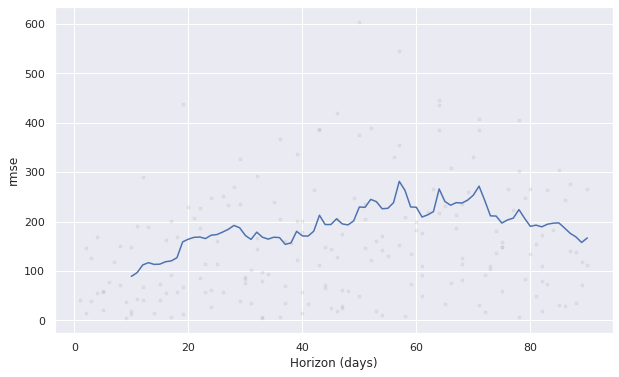

In [54]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(eval_df, metric='rmse');

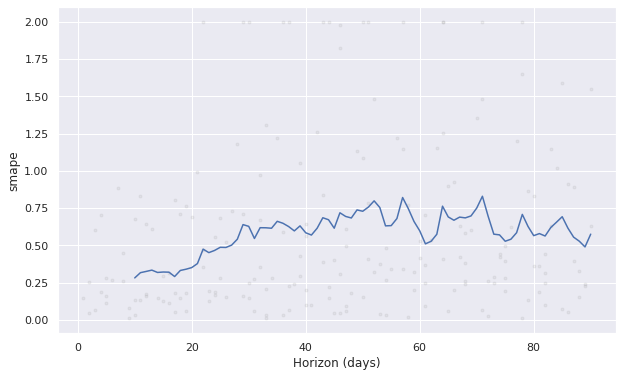

In [55]:

plot_cross_validation_metric(eval_df, metric='smape');

## Automate model fitting and evaluation

In [56]:
routes = (traffic_df
.drop_duplicates(subset=['home_airport', 'paired_airport'])
[['home_airport', 'paired_airport']]
.to_dict(orient='rows')
)

<ipython-input-56-ea2dbdcbec05>:1: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



In [57]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

In [58]:
models = dict()
performances = dict()

for route in routes:
  print(route)
  home = route['home_airport']
  paired = route['paired_airport']
  # Build route traffic dataframe
  _df = generate_route_df(traffic_df, home, paired)
  # Create a model 
  _model= Prophet()
  # Fit & evaluate the model
  _model.fit(_df.rename(columns={'date':'ds', 'pax_total':'y'}))
  # Cross validate the model
  _cv_df = cross_validation(_model, horizon='90 days', parallel="processes")
  _perf_df = performance_metrics(_cv_df, rolling_window=1)
  # Save results
  models[(route['home_airport'], route['paired_airport'])] = _model
  performances[(route['home_airport'], route['paired_airport'])] = _perf_df['rmse'].values[0]


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'BCN'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-10 00:00:00 and 2022-12-10 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae8874c0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'AMS'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae685760>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'ORY'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae863430>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'OPO'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae7b80d0>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'SSA', 'paired_airport': 'GRU'}


INFO:prophet:Making 24 forecasts with cutoffs between 2020-02-08 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae6a40d0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 20 forecasts with cutoffs between 2020-08-02 00:00:00 and 2022-12-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae7d08b0>


{'home_airport': 'NTE', 'paired_airport': 'FUE'}


INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 26 forecasts with cutoffs between 2018-11-24 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae816250>


{'home_airport': 'LYS', 'paired_airport': 'PIS'}


INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints g

{'home_airport': 'PNH', 'paired_airport': 'NGB'}


INFO:prophet:Making 11 forecasts with cutoffs between 2017-10-02 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae6d73a0>
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'POP', 'paired_airport': 'JFK'}


INFO:prophet:Making 32 forecasts with cutoffs between 2019-02-13 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae6a4af0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'SCL', 'paired_airport': 'LHR'}


INFO:prophet:Making 13 forecasts with cutoffs between 2020-01-04 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6bae7bd070>


In [59]:
models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f6bae597220>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f6bae8a3bb0>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f6bae8a37f0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f6bae6cc0a0>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f6bae89d880>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f6bae6a40d0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f6bae7d0190>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f6bae887b80>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f6bae6924f0>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f6bae6a19a0>}

In [60]:
performances

{('LGW', 'BCN'): 1252.80455530257,
 ('LGW', 'AMS'): 927.4295007587415,
 ('LIS', 'ORY'): 871.9787557259463,
 ('LIS', 'OPO'): 607.0948037131809,
 ('SSA', 'GRU'): 1952.9757983596164,
 ('NTE', 'FUE'): 192.23652122836083,
 ('LYS', 'PIS'): 632.5392618552802,
 ('PNH', 'NGB'): 1562.754400403463,
 ('POP', 'JFK'): 76.63391104712609,
 ('SCL', 'LHR'): 146.91799138474485}

## Save models

 Sérialisation / désérialisation avec joblib => per registrare un oggetto nel disco duro che potrebbe essere caricato più tardi

In [61]:
from prophet.serialize import model_to_json, model_from_json

for model in models: 
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=model[0], paired=model[1])
  with open(_filename, 'w') as f:
    f.write(model_to_json(models[model]))


In [62]:
reload_models = dict()

In [63]:
for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=route['home_airport'], paired=route['paired_airport'])
  with open(_filename, 'r') as f:
    reload_models[(route['home_airport'], route['paired_airport'])] = model_from_json(f.read())

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimest

In [64]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f6bb29c67c0>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f6bb338e640>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f6bae800bb0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f6bae6a1f40>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f6bb338e850>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f6bae7687c0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f6bb3883dc0>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f6bae680f70>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f6bb2bf8040>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f6bb2de4700>}

In [65]:
from joblib import dump, load


for model in models: 
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=model[0], paired=model[1])
  dump(models[model], _filename)


In [66]:
reload_models = dict()

for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=route['home_airport'], paired=route['paired_airport'])
  with open(_filename, 'r') as f:
    reload_models[(route['home_airport'], route['paired_airport'])] = load(_filename)

In [67]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f6bb37ffb20>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f6bcf73b550>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f6bb85794c0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f6bcf73bc40>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f6bb86758e0>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f6bb2b9fee0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f6bb8675a00>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f6bb8761940>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f6bb882b580>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f6bb8761d30>}

# Model with Nixtla

questo é molto flessibile si puo dividere per data prima  e dopo una certa data

In [68]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

from mlforecast import MLForecast
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

tested_models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]


@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)


fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14, 21, 28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek'],
    differences=[1],
)

#date_features possiamo specificare le date e i periodi che vogliamo

In [69]:
nixtla_model = fcst.fit(generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']), id_col='home_airport', time_col='date', target_col='pax_total')

In [70]:
predict_df = nixtla_model.predict(14)
predict_df

home_airport       date  LGBMRegressor  XGBRegressor  RandomForestRegressor
0           LGW 2023-03-10    2522.142311   2416.332520                2447.83
1           LGW 2023-03-11    1375.064901   1125.572388                1219.15
2           LGW 2023-03-12    2385.056909   1795.271851                2252.45
3           LGW 2023-03-13    1667.920360   1334.042480                1824.71
4           LGW 2023-03-14    1650.751786   1582.571167                1633.86
5           LGW 2023-03-15    1418.832738   1090.876709                1259.96
6           LGW 2023-03-16    2099.141695   1895.774170                2080.54
7           LGW 2023-03-17    2409.705368   2147.150146                2365.46
8           LGW 2023-03-18    1465.166364   1006.790649                1080.81
9           LGW 2023-03-19    2544.719226   1646.215820                2135.46
10          LGW 2023-03-20    1903.983106   1334.463745                1858.66
11          LGW 2023-03-21    1468.840952   1440.680298                1535.54
12          LGW 2023-03-22    1461.127450   1616.794922                1597.83
13          LGW 2023-03-23    2089.815550   2439.141602                2501.09

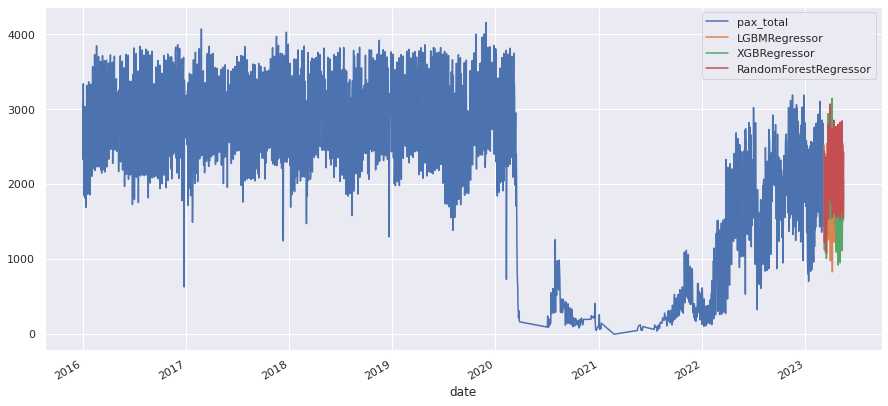

In [71]:
(pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [72]:
draw_ts_multiple((pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])), 
            v1='pax_total', v2='LGBMRegressor');


In [73]:
crossvalidation_df = fcst.cross_validation(
    data=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
    window_size=90,
    n_windows=5,
    id_col='home_airport',
    time_col='date',
    target_col='pax_total'
)

/usr/local/lib/python3.9/dist-packages/mlforecast/forecast.py:548: UserWarning:

Excuting `cross_validation` after `fit` can produce unexpected errors



In [74]:
crossvalidation_df 

home_airport       date     cutoff  pax_total  LGBMRegressor  \
0            LGW 2021-12-15 2021-12-14      229.0     348.645547   
1            LGW 2021-12-16 2021-12-14      429.0     593.762678   
2            LGW 2021-12-17 2021-12-14      676.0     670.195026   
3            LGW 2021-12-18 2021-12-14      286.0     409.170319   
4            LGW 2021-12-19 2021-12-14      676.0     803.159270   
..           ...        ...        ...        ...            ...   
445          LGW 2023-03-05 2022-12-09     2815.0    1865.829097   
446          LGW 2023-03-06 2022-12-09     1916.0    2222.291755   
447          LGW 2023-03-07 2022-12-09     1741.0    2131.488022   
448          LGW 2023-03-08 2022-12-09     1432.0    2069.155381   
449          LGW 2023-03-09 2022-12-09     2029.0    2307.119953   

     XGBRegressor  RandomForestRegressor  
0      281.325165                 267.72  
1      508.705139                 428.76  
2      623.942871                 445.82  
3      532.024414                 339.56  
4      850.288818                 678.39  
..            ...                    ...  
445   2310.340332                1553.94  
446   2665.737549                1668.80  
447   1903.722290                1928.02  
448   1967.471924                2089.95  
449   2178.843750                2303.74  

[450 rows x 7 columns]

In [75]:
!pip install datasetsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 18.4 MB/s eta 0:00:00


In [76]:
from datasetsforecast.losses import rmse

cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("RMSE using cross-validation: ", cv_rmse)

RMSE using cross-validation:  1123.0405776208863


In [77]:
import numpy as np

def mse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.nanmean(delta_y)

def rmse(y, y_hat):
  return np.sqrt(mse(y, y_hat))

cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("RMSE using cross-validation: ", cv_rmse)

RMSE using cross-validation:  1123.0405776208863


In [78]:
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("LGBM RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['XGBRegressor'])).mean()
print("XGB RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['RandomForestRegressor'])).mean()
print("RandomForestRegressor RMSE using cross-validation: ", cv_rmse)

cv_rmse = (crossvalidation_df
           .assign(Ensemble=lambda _df: _df[['LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor']].mean(axis=1))           
           .groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['Ensemble'])).mean())
print("Ensemble RMSE using cross-validation:", cv_rmse)

LGBM RMSE using cross-validation:  1123.0405776208863
XGB RMSE using cross-validation:  1220.3735710301205
RandomForestRegressor RMSE using cross-validation:  1013.2061289311698
Ensemble RMSE using cross-validation: 1047.6225207933953


# Model Neural Forecast

In [79]:
!pip install neuralforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 KB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 20.6 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.51.3
    Uninstalling grpcio-1.51.3:
      Successfully uninstalled grpcio-1.51.3
  Attempting uninstall:

In [80]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

In [81]:
horizon = 90
models = [NBEATS(input_size=2 * horizon, h=horizon, max_epochs=50),
          NHITS(input_size=2 * horizon, h=horizon, max_epochs=50)]

In [82]:
nforecast = NeuralForecast(models=models, freq='D')
nforecast.fit(df=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id', 'date': 'ds', 'pax_total': 'y'}))

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [83]:
neural_model = _

In [84]:
neural_model

home_airport       date     cutoff  pax_total  LGBMRegressor  \
0            LGW 2021-12-15 2021-12-14      229.0     348.645547   
1            LGW 2021-12-16 2021-12-14      429.0     593.762678   
2            LGW 2021-12-17 2021-12-14      676.0     670.195026   
3            LGW 2021-12-18 2021-12-14      286.0     409.170319   
4            LGW 2021-12-19 2021-12-14      676.0     803.159270   
..           ...        ...        ...        ...            ...   
445          LGW 2023-03-05 2022-12-09     2815.0    1865.829097   
446          LGW 2023-03-06 2022-12-09     1916.0    2222.291755   
447          LGW 2023-03-07 2022-12-09     1741.0    2131.488022   
448          LGW 2023-03-08 2022-12-09     1432.0    2069.155381   
449          LGW 2023-03-09 2022-12-09     2029.0    2307.119953   

     XGBRegressor  RandomForestRegressor  
0      281.325165                 267.72  
1      508.705139                 428.76  
2      623.942871                 445.82  
3      532.024414                 339.56  
4      850.288818                 678.39  
..            ...                    ...  
445   2310.340332                1553.94  
446   2665.737549                1668.80  
447   1903.722290                1928.02  
448   1967.471924                2089.95  
449   2178.843750                2303.74  

[450 rows x 7 columns]

In [85]:
nforecast

In [86]:
nforecast.predict().reset_index()

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

unique_id         ds       NBEATS        NHITS
0        LGW 2023-03-10  2265.771729  2221.245361
1        LGW 2023-03-11  1099.371582  1087.281616
2        LGW 2023-03-12  1955.275635  1997.968506
3        LGW 2023-03-13  1979.947266  2145.859619
4        LGW 2023-03-14  1705.986816  1522.316406
..       ...        ...          ...          ...
85       LGW 2023-06-03  1152.167725  1228.784668
86       LGW 2023-06-04  1912.655151  1931.157471
87       LGW 2023-06-05  2048.486328  2121.950928
88       LGW 2023-06-06  1654.967651  1506.189331
89       LGW 2023-06-07  1523.215088  1620.447144

[90 rows x 4 columns]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='ds'>

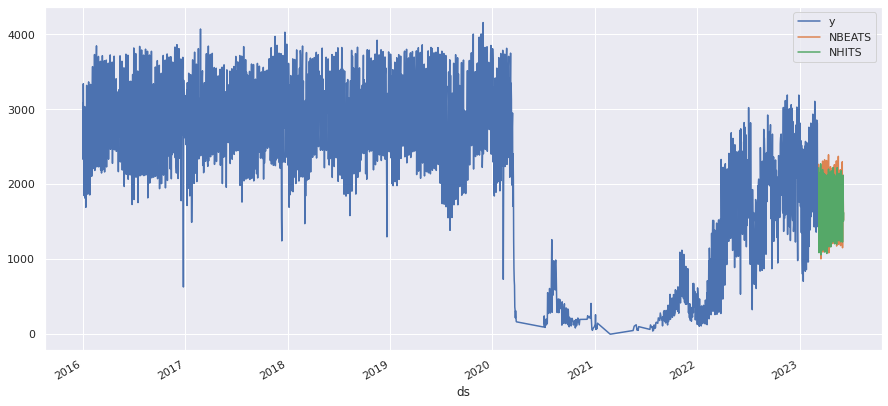

In [87]:
pd.concat(
    [
        generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                     'date': 'ds',
                                                                                                     'pax_total': 'y'}),
        nforecast.predict().reset_index()
    ]
).set_index('ds').plot(figsize=(15,7))

Applications analytiques sur python
- notebook ipywidgets : https://ipywidgets.readthedocs.io/en/latest/
- Streamlit: applicazione pero secondo un formato preciso  (cloud) consultabile (Streamlit to dash) su R Shiny ma esiste una versione python (wireframing) - RAD
- Dash  -RAD
- bokeh sconsigliata

